In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

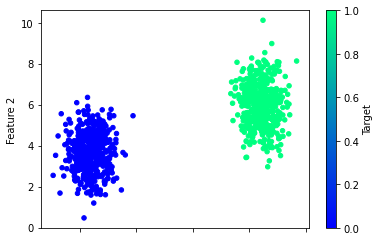

In [5]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [6]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Normalize the dummy data

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the daa
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# Add first Dense layer, including input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [11]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [13]:
# Check the structure of the sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.8653
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.9293
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.9333
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.9387
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.9427
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.9453
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.9480
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.9493
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.9493
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.9533
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0895 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0866 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

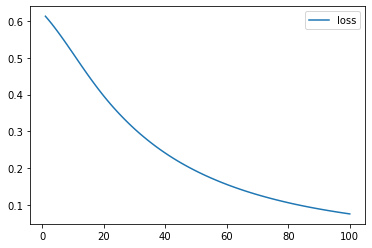

In [16]:
# Create a dataframe containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

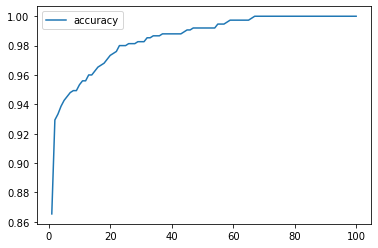

In [18]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0707 - accuracy: 1.0000 - 154ms/epoch - 19ms/step
Loss: 0.07068312168121338, Accuracy: 1.0


In [20]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 71ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

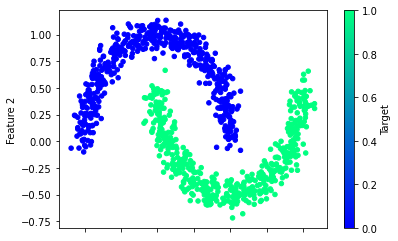

In [25]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [26]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [27]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1739 - accuracy: 0.4320
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0277 - accuracy: 0.4573
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9304 - accuracy: 0.4827
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8666 - accuracy: 0.5027
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8212 - accuracy: 0.5293
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7849 - accuracy: 0.5440
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7549 - accuracy: 0.5573
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7296 - accuracy: 0.5707
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.5827
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5907
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2869 - accuracy: 0.8733
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8733
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2848 - accuracy: 0.8733
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.8733
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8733
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.8733
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2808 - accuracy: 0.8747
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.8787
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.8787
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.8800
Epoch 93/100


<AxesSubplot:>

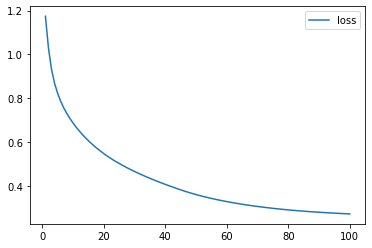

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

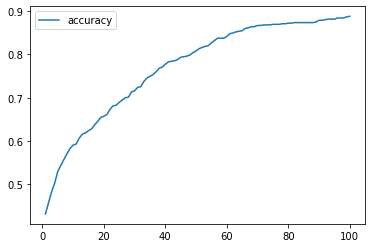

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [30]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [31]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [32]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.6093
Epoch 2/100
24/24 [==============================] - 0s 997us/step - loss: 0.5397 - accuracy: 0.7147
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.8093
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5085 - accuracy: 0.8427
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.8547
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.8680
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.8760
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8827
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8827
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8813
Epoch 1

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2017 - accuracy: 0.9080
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2006 - accuracy: 0.9093
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9093
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1985 - accuracy: 0.9093
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1973 - accuracy: 0.9093
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.9133
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1954 - accuracy: 0.9107
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1940 - accuracy: 0.9120
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9147
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9160
